## import  statements

In [68]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zlib import crc32
import numpy as np
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit

## variables

In [69]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("data", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

test_ratio = 0.2
%matplotlib inline
sns.set(rc={'figure.figsize':(19,14)})
sns.set(font_scale = 1.25)

## functions

In [70]:
def unique_values(df, col):
    '''
    Displays the unique number and unique values
    '''
    if isinstance(col, list):
        for i in col:
            cnt = 0
            visited = []
            for j in range(0, len((df[i]))):
                if df[i][j] not in visited: 
                    visited.append(df[i][j])
                    cnt += 1
            print(f'\nno.of.unique values - {cnt} : column - {i}')
            if len(visited) < 20:
                print(f'unique values : {visited}')
    else:
        cnt = 0
        visited = []
        for j in range(0, len(df[col])):
            if df[col][j] not in visited: 
                visited.append(df[col][j])
                cnt += 1
        print(f'\n{col}')
        print(f'no.of.unique values - {cnt}')
        if len(visited) < 20:
            print(f'unique values : {visited}')
            
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    print(f' shuffled indicies \n{shuffled_indicies}')
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

## obtain the dataset

In [71]:
fetch_housing_data()
housing = load_housing_data()

## explore data

In [72]:
print('')
print(f'\n{housing.info()}\n')
print(display(housing.sample(5)))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

None



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2857,-118.94,35.40,14.0,5548.0,941.0,2815.0,935.0,4.2214,104600.0,INLAND
3952,-118.64,34.22,16.0,4312.0,574.0,1902.0,574.0,8.4438,390000.0,<1H OCEAN
18460,-121.80,37.26,16.0,1868.0,285.0,995.0,284.0,5.9053,260500.0,<1H OCEAN
7674,-118.09,33.92,36.0,2381.0,419.0,1669.0,444.0,4.6976,171100.0,<1H OCEAN
8412,-118.35,33.94,38.0,1794.0,508.0,2188.0,454.0,2.6654,142200.0,<1H OCEAN


None


In [73]:
print('Count of values in columns :')
for nr, i in enumerate(housing.columns):
    if nr != 0:
        print(f'{round(housing.loc[:,i].count()/max(housing.count()),2):.2f}% : {housing.loc[:,i].count()} : {i}')

Count of values in columns :
1.00% : 20640 : latitude
1.00% : 20640 : housing_median_age
1.00% : 20640 : total_rooms
0.99% : 20433 : total_bedrooms
1.00% : 20640 : population
1.00% : 20640 : households
1.00% : 20640 : median_income
1.00% : 20640 : median_house_value
1.00% : 20640 : ocean_proximity


In [74]:
# number of unique columns
unique_values(housing,housing.columns.tolist())


no.of.unique values - 844 : column - longitude

no.of.unique values - 862 : column - latitude

no.of.unique values - 52 : column - housing_median_age

no.of.unique values - 5926 : column - total_rooms

no.of.unique values - 2130 : column - total_bedrooms

no.of.unique values - 3888 : column - population

no.of.unique values - 1815 : column - households

no.of.unique values - 12928 : column - median_income

no.of.unique values - 3842 : column - median_house_value

no.of.unique values - 5 : column - ocean_proximity
unique values : ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']


In [75]:
print(display(round(housing.describe(),2)))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


None


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00



None



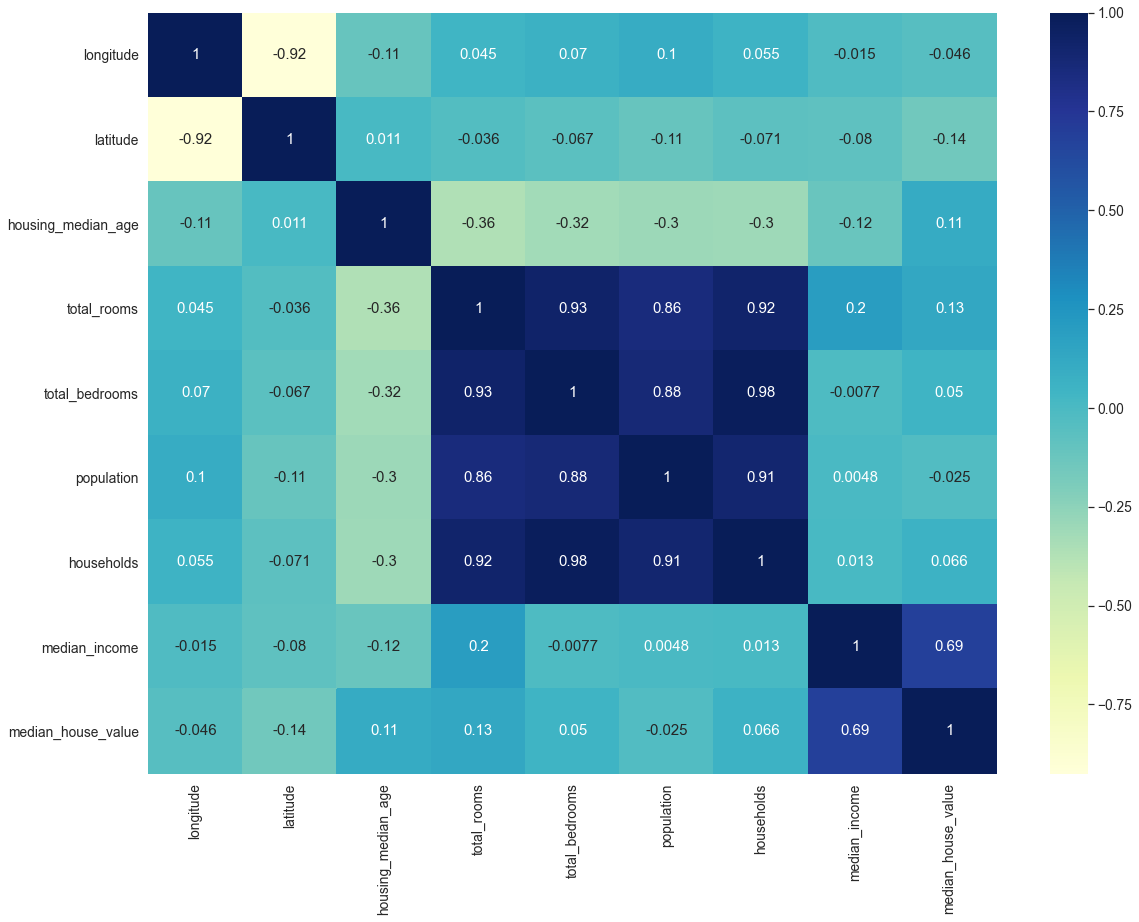

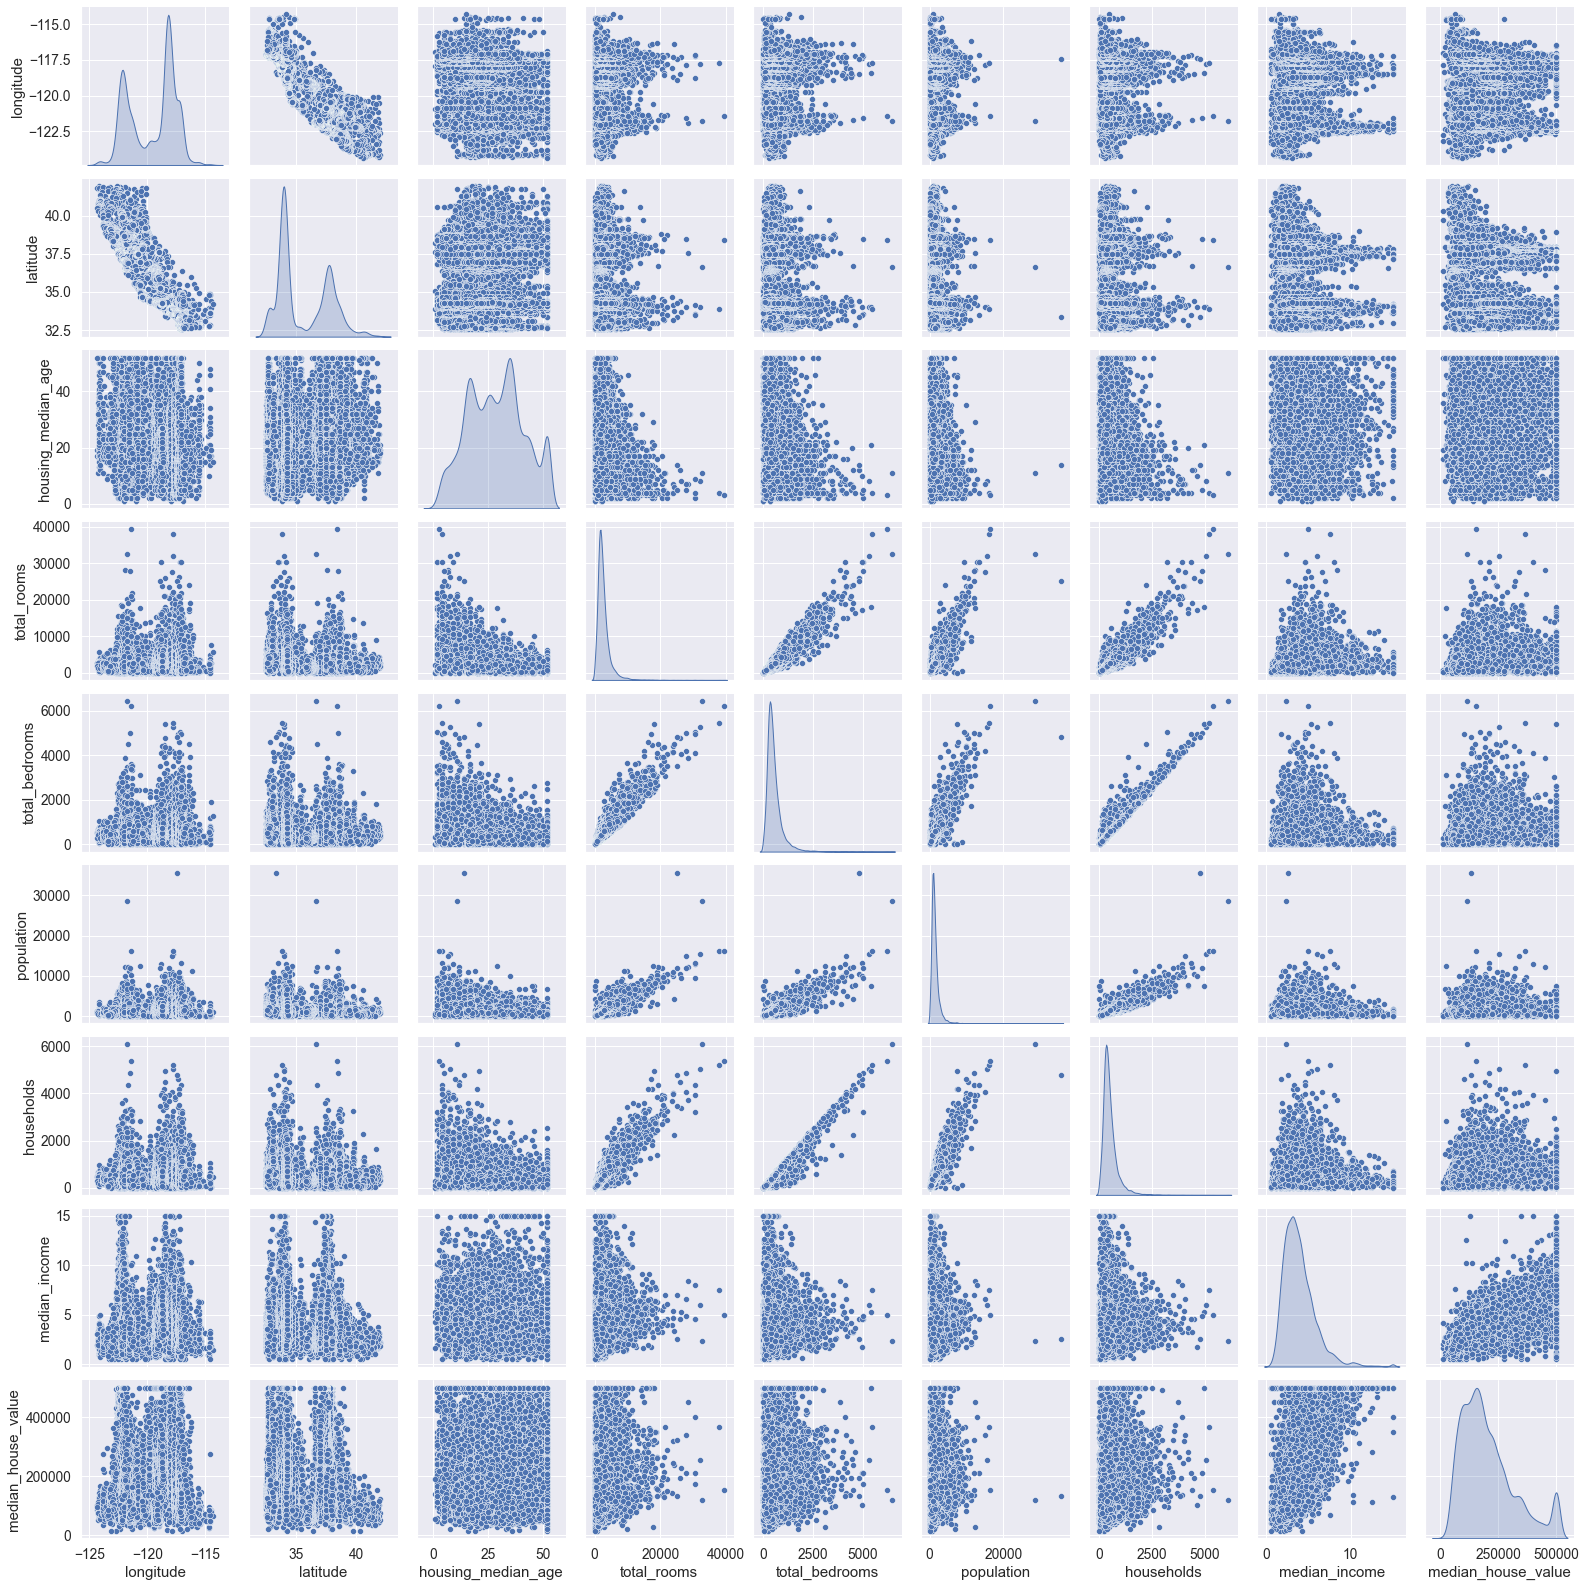

In [76]:
temp = ['']
print(f'\n{display(round(housing.corr(),2))}')
# plotting correlation heatmap
dataplot=sns.heatmap(housing.corr(), cmap="YlGnBu", annot=True)
print('')
sns.pairplot(housing, diag_kind='kde');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

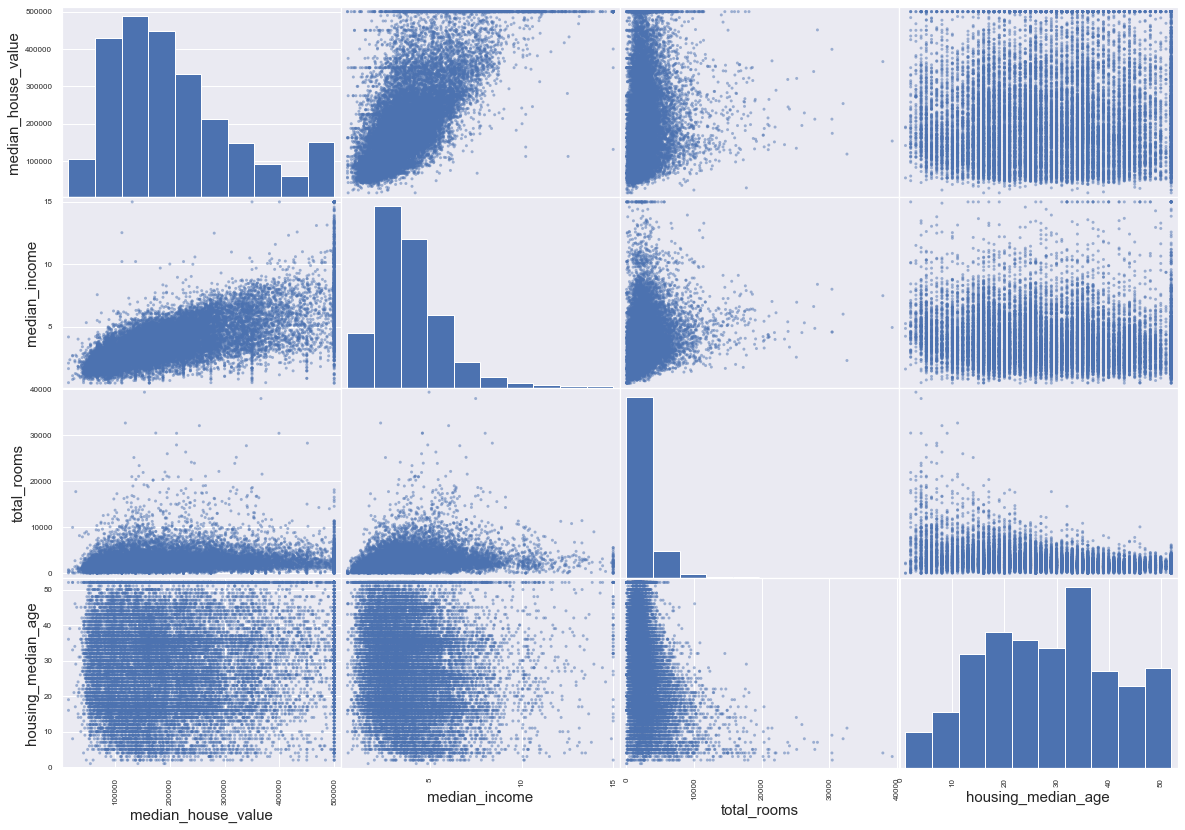

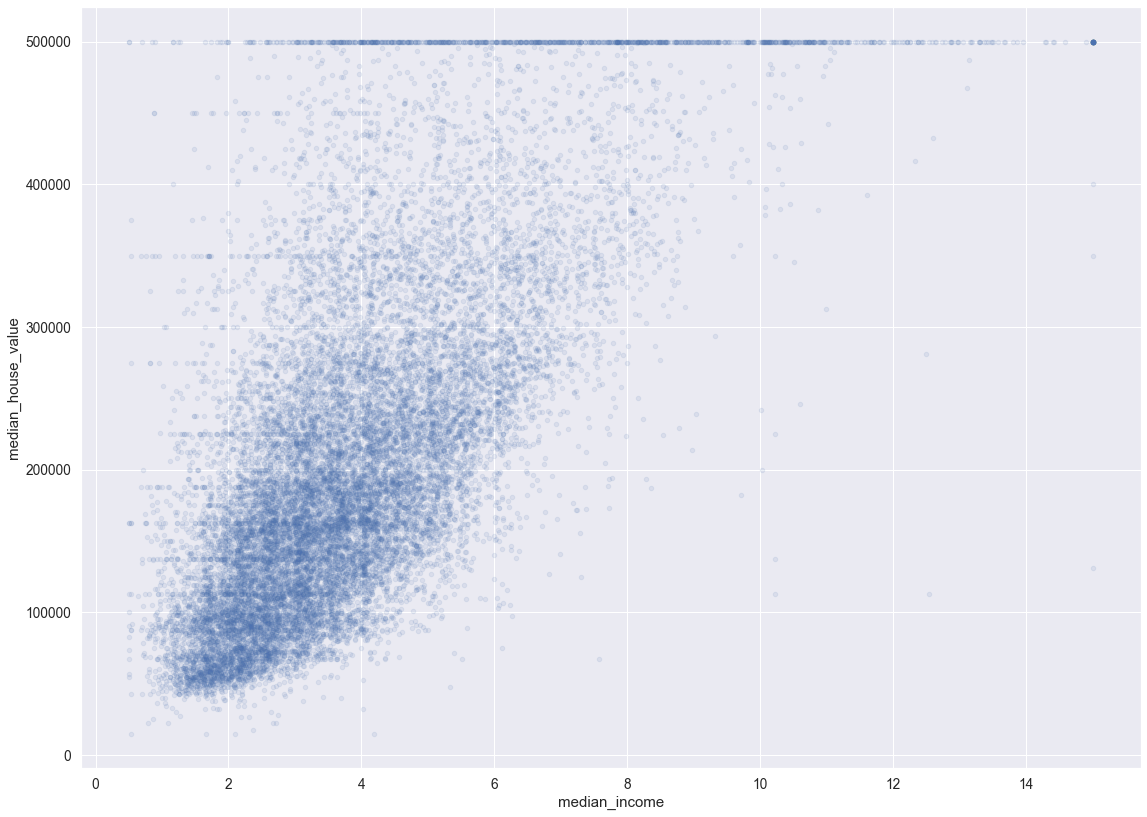

In [77]:
attributes = ["median_house_value",
              "median_income",
              "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20, 14));
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)

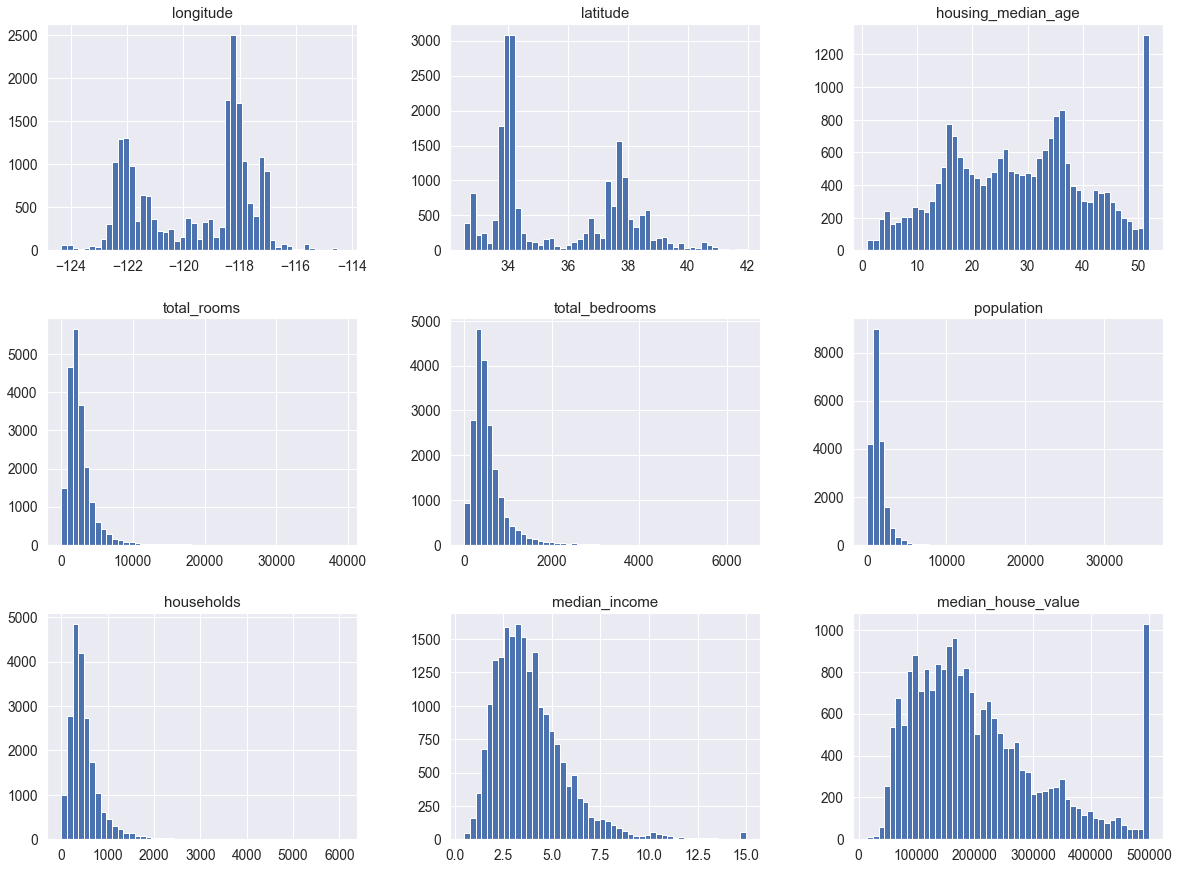

In [78]:
print('')
housing.hist(bins=50, figsize=(20,15));
plt.show()

## Histogram analysis
Median income - scaled and capped at 0.5 (0.499) and 15 (15.0001). That MIN and MAX cap does not affect the distribution right skewed data
Median age and median house value MAX cap does where you have a spike at 50/500000. You will have to correct for this by proper labeling of 
 the data OR by eliminating it.
Many of the histograms look "tail heavy" especially to the right, so it is more difficult for ML to detect patterns. 

In [79]:
housing['median_income'].tail(5)*10000

20635    15603.0
20636    25568.0
20637    17000.0
20638    18672.0
20639    23886.0
Name: median_income, dtype: float64

## Construct test set

In [80]:
''' to avoid training data that you already set aside for training,
compute a hash of each instance/row's identifier a if the hash is below
the testing split value (20%) then allocate the data in the test set.'''
housing_with_id = housing.reset_index() # adds an 'index' column
print(display(housing_with_id.sample(5)))
train_set, test_set = split_train_test_by_id(data = housing_with_id,
                                             test_ratio = test_ratio,
                                             id_column = 'index')

print(f'\ntraining set count : {len(train_set)} ({round((len(train_set)/(len(train_set)+len(test_set)))*100,2)}%)')
print(tabulate(train_set.sample(5), headers='keys', tablefmt='psql', showindex=False))

print(f'\ntest set count : {len(test_set)} ({round((len(test_set)/(len(train_set)+len(test_set)))*100,2)}%)')
print(tabulate(test_set.sample(5), headers='keys', tablefmt='psql', showindex=False))

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18183,18183,-122.04,37.37,42.0,1125.0,273.0,616.0,258.0,3.6765,252800.0,<1H OCEAN
19175,19175,-122.65,38.37,15.0,1848.0,280.0,786.0,282.0,5.7204,344100.0,<1H OCEAN
1381,1381,-122.11,38.00,9.0,3424.0,583.0,1460.0,543.0,5.7600,212600.0,NEAR BAY
6449,6449,-118.04,34.12,39.0,2522.0,380.0,1113.0,357.0,5.2249,445200.0,INLAND
1630,1630,-122.17,37.88,32.0,3633.0,508.0,1393.0,506.0,7.6917,401800.0,NEAR BAY


None

training set count : 16512 (80.0%)
+---------+-------------+------------+----------------------+---------------+------------------+--------------+--------------+-----------------+----------------------+-------------------+
|   index |   longitude |   latitude |   housing_median_age |   total_rooms |   total_bedrooms |   population |   households |   median_income |   median_house_value | ocean_proximity   |
|---------+-------------+------------+----------------------+---------------+------------------+--------------+--------------+-----------------+----------------------+-------------------|
|    8072 |     -118.17 |      33.82 |                   52 |          2539 |              497 |         1152 |          488 |          4.1354 |               268200 | NEAR OCEAN        |
|    6991 |     -118.03 |      33.97 |                   22 |          2185 |              623 |         1644 |          606 |          2.593  |               192000 | <1H OCEAN         |
|    2986 |     -11

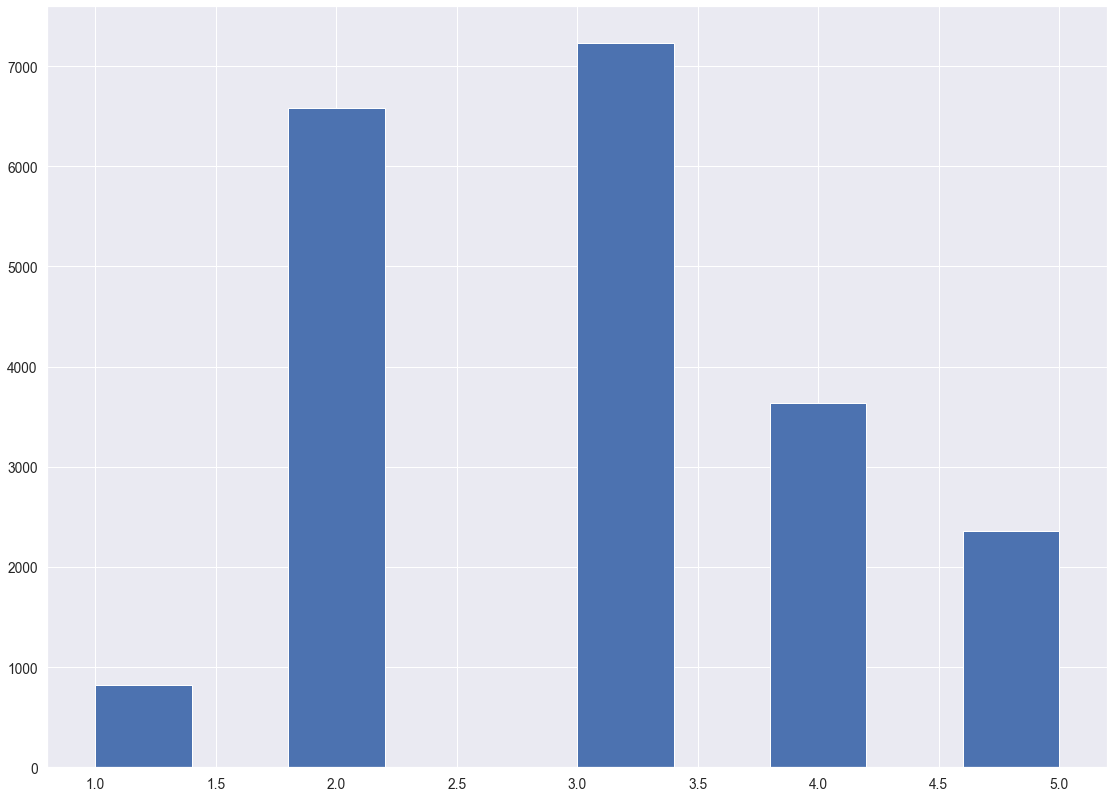

In [81]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [82]:
print(f'\nStratified test set counts / amount :\n' 
      f'{strat_test_set["income_cat"].value_counts() / len(strat_test_set)}')


Stratified test set counts / amount :
3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [83]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [84]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f'\ntraining set count : {len(train_set)} ({round((len(train_set)/(len(train_set)+len(test_set)))*100,2)}%)')
print(tabulate(train_set.sample(5), headers='keys', tablefmt='psql', showindex=False))

print(f'\ntest set count : {len(test_set)} ({round((len(test_set)/(len(train_set)+len(test_set)))*100,2)}%)')
print(tabulate(test_set.sample(5), headers='keys', tablefmt='psql', showindex=False))


training set count : 16512 (80.0%)
+-------------+------------+----------------------+---------------+------------------+--------------+--------------+-----------------+----------------------+-------------------+--------------+
|   longitude |   latitude |   housing_median_age |   total_rooms |   total_bedrooms |   population |   households |   median_income |   median_house_value | ocean_proximity   |   income_cat |
|-------------+------------+----------------------+---------------+------------------+--------------+--------------+-----------------+----------------------+-------------------+--------------|
|     -118.22 |      33.99 |                   24 |          1402 |              482 |         1976 |          466 |          2.6964 |               163200 | <1H OCEAN         |            2 |
|     -120.4  |      34.95 |                    8 |          1885 |              286 |          835 |          290 |          5.0206 |               261000 | <1H OCEAN         |            4 |

## visualizing geographical data

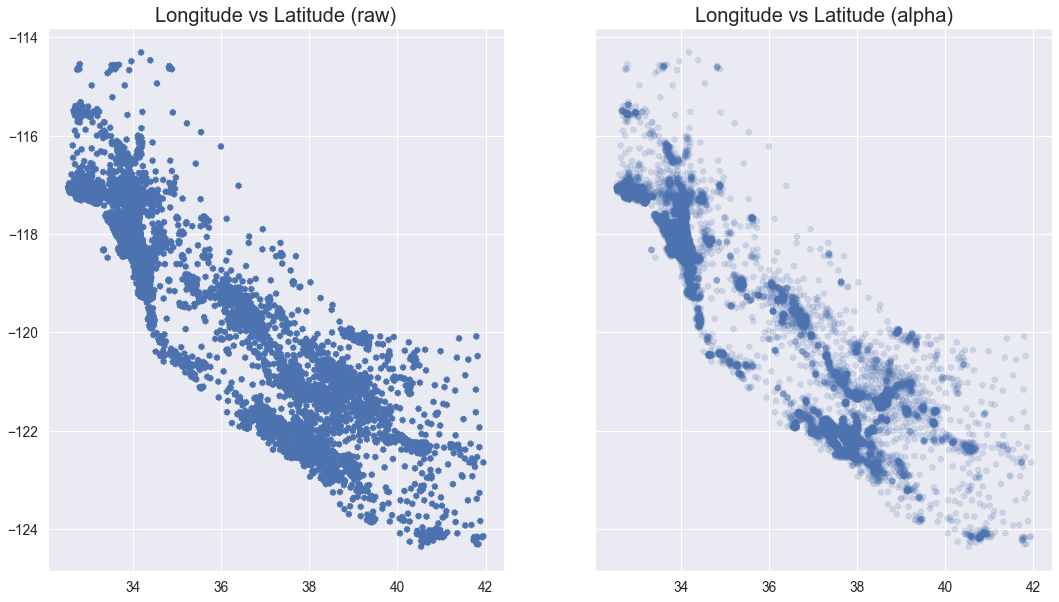

In [85]:

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18,10));
print('\n')
ax1.set_title('Longitude vs Latitude (raw)', fontsize=20);
ax2.set_title('Longitude vs Latitude (alpha)', fontsize=20);
ax1.scatter(housing['latitude'], housing['longitude'], linestyle='dotted', linewidth=1);
ax2.scatter(housing['latitude'], housing['longitude'], linestyle='dotted', linewidth=1, alpha=.2);


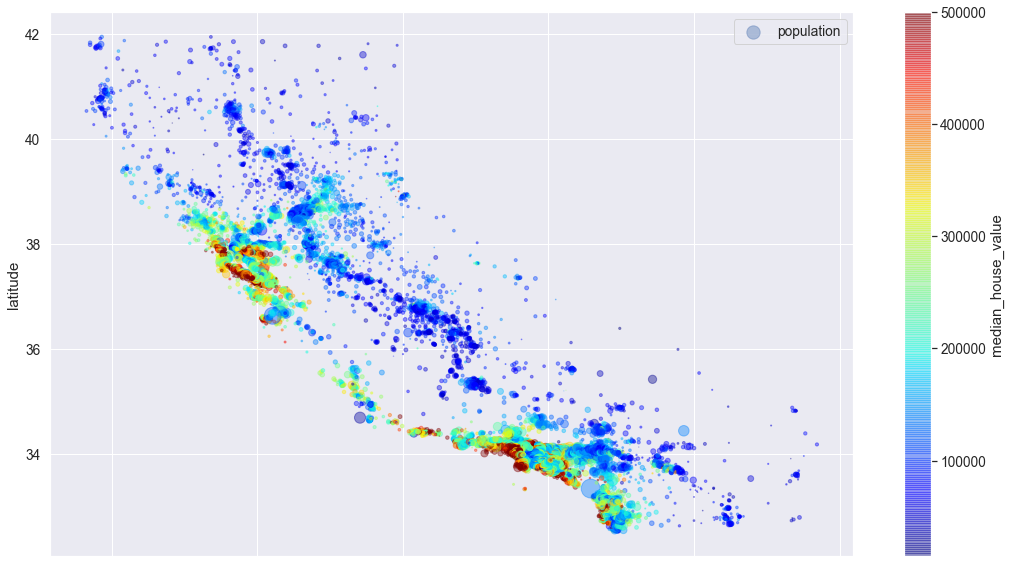

In [86]:
print('')
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(18,10),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend();

## Experimenting with Attribute Combinations

In [87]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

print('')
print(tabulate(housing[["rooms_per_household","total_rooms","households"]].sample(5),headers='keys',
               tablefmt='psql',
               showindex=False))


print('')
print(tabulate(housing[["bedrooms_per_room","total_bedrooms","total_rooms"]].sample(5),headers='keys',
               tablefmt='psql',
               showindex=False))

print('')
print(tabulate(housing[["population_per_household","population","households"]].sample(5),headers='keys',
               tablefmt='psql',
               showindex=False))


+-----------------------+---------------+--------------+
|   rooms_per_household |   total_rooms |   households |
|-----------------------+---------------+--------------|
|               5.76935 |          3727 |          646 |
|               5.72139 |          1150 |          201 |
|               5.71041 |          1262 |          221 |
|               6.1931  |          2694 |          435 |
|               5.95429 |          1042 |          175 |
+-----------------------+---------------+--------------+

+---------------------+------------------+---------------+
|   bedrooms_per_room |   total_bedrooms |   total_rooms |
|---------------------+------------------+---------------|
|            0.137681 |              133 |           966 |
|            0.249034 |              580 |          2329 |
|            0.204229 |              454 |          2223 |
|            0.279935 |              519 |          1854 |
|            0.198837 |             1539 |          7740 |
+------------

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05,-0.03,0.09,0.00
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14,0.11,-0.11,0.00
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11,-0.15,0.14,0.01
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13,0.13,-0.19,-0.02
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05,0.00,0.08,-0.03
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02,-0.07,0.04,0.07
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07,-0.08,0.07,-0.03
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69,0.33,-0.62,0.02
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00,0.15,-0.26,-0.02
rooms_per_household,-0.03,0.11,-0.15,0.13,0.00,-0.07,-0.08,0.33,0.15,1.00,-0.42,-0.00



None


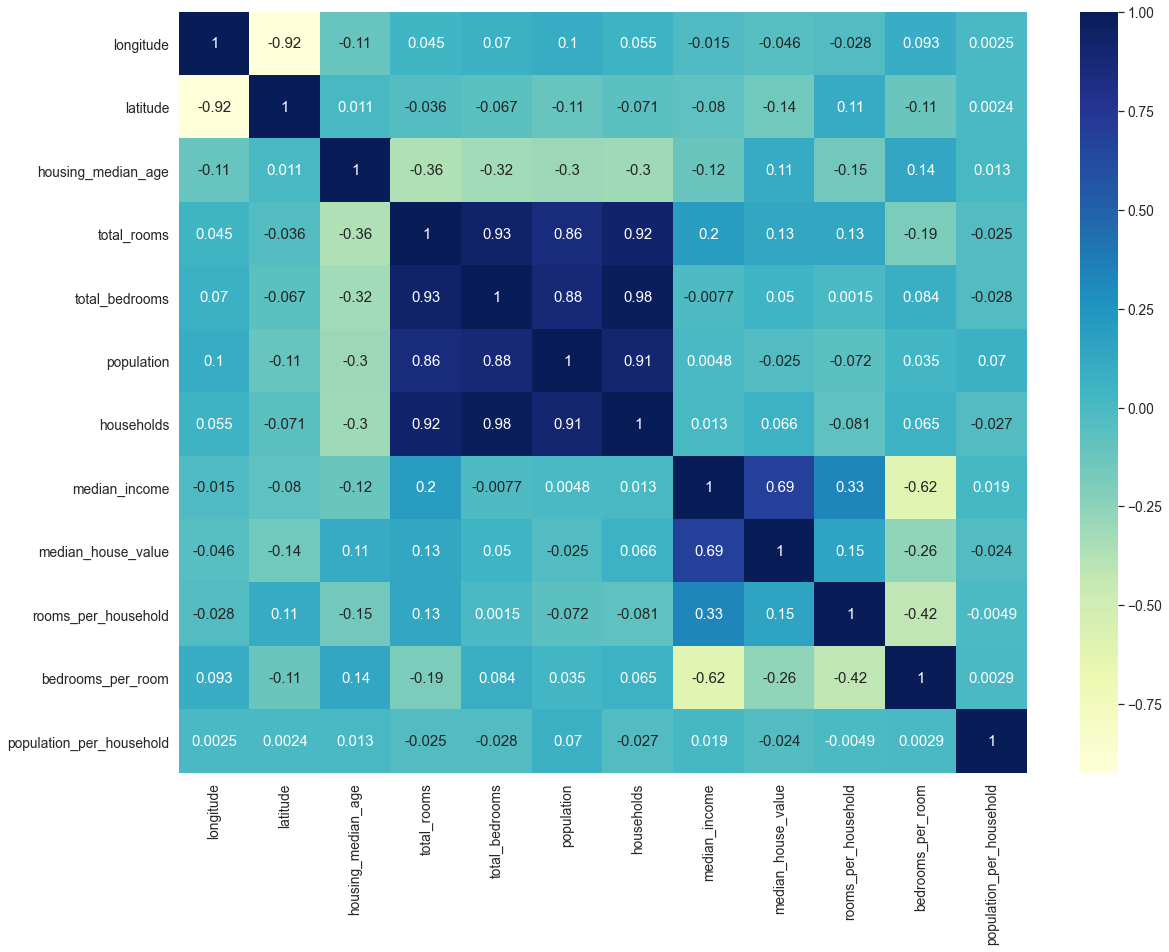

In [88]:
print(f'\n{display(round(housing.corr(),2))}')
# plotting correlation heatmap
dataplot=sns.heatmap(housing.corr(), cmap="YlGnBu", annot=True)